In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/stock_model_data_v3.0.csv')
df.shape

(1375085, 49)

In [0]:
df.head()

,Symbols,Date,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,EMA_PCH50,ROC5,ROC15,ROC50,MOM_PCH5,MOM_PCH15,MOM_PCH50,macdhist,RSI,StochK,StochD,CMO,AroonUp,AroonDown,ChaikinAD,MFI,WillR,ULTOS,MA_BIN5,MA_BIN15,MA_BIN50,EMA_BIN5,EMA_BIN15,EMA_BIN50,ROC_BIN5,ROC_BIN15,ROC_BIN50,MOM_BIN5,MOM_BIN15,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
0,20MICRONS.NS,2015-03-17,0,0,0,-0.028324,-0.619374,-5.776217,-0.128374,-1.196622,-4.130699,-0.141451,-2.754825,16.118412,-0.141652,-2.832865,13.881013,-0.018553,44.654238,26.666771,21.389005,-10.691524,100.0,24.0,-39802.853071,31.386050,-79.104469,28.299750,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.027104,-0.062579,-0.016417,0.162006,-0.296453,-0.168612,0.020377,-0.017248
1,20MICRONS.NS,2015-03-18,1,0,0,-0.594737,-0.959373,-6.527129,-0.463886,-1.540035,-4.473790,0.000000,-3.305790,14.146333,0.000000,-3.418809,12.393156,-0.011341,42.897735,0.000000,14.444479,-14.204529,96.0,20.0,-44958.858662,40.888905,-79.166680,26.291190,0,0,0,0,0,0,0,0,1,1,0,1,0,-0.063537,-0.115363,0.089180,0.357055,-0.329759,-0.249793,0.038237,-0.079502
2,20MICRONS.NS,2015-03-19,0,0,0,-0.141833,-0.593041,-6.477486,-0.120266,-1.103674,-4.021913,-0.845066,-1.262260,14.100497,-0.852268,-1.278397,12.357963,0.005073,44.082184,13.334165,13.333645,-11.835631,92.0,16.0,-49014.263402,41.359657,-74.999921,25.399437,0,0,0,0,0,0,0,0,1,0,0,1,1,-0.084301,-0.110805,0.062925,0.333051,-0.227927,-0.189294,0.040711,-0.038782
3,20MICRONS.NS,2015-03-20,0,0,0,-0.284095,-0.847463,-6.982913,-0.269718,-1.213539,-4.112059,-0.707223,-0.425535,16.033060,-0.712260,-0.427354,13.817665,0.013889,43.118985,0.000000,4.444722,-13.762030,88.0,12.0,-51912.119485,39.205711,-78.260898,24.873025,0,0,0,0,0,0,0,0,1,0,0,1,1,-0.036456,-0.083404,0.068255,0.321459,-0.219496,-0.173907,0.054477,-0.040057
4,20MICRONS.NS,2015-03-23,1,0,0,-1.541101,-2.293976,-8.773608,-1.325062,-2.548441,-5.511520,-2.266292,-3.765688,13.673796,-2.318844,-3.913041,12.028978,-0.013779,37.784663,0.000000,4.444722,-24.430673,100.0,8.0,-58934.898772,39.488791,-95.238164,21.811585,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.018645,-0.037138,-0.025653,0.333212,-0.380410,-0.298181,0.070855,-0.092486


In [0]:
df=df.iloc[:50000,:]

In [0]:
df_train=df.iloc[0:1,:]
df_train

,Symbols,Date,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,EMA_PCH50,ROC5,ROC15,ROC50,MOM_PCH5,MOM_PCH15,MOM_PCH50,macdhist,RSI,StochK,StochD,CMO,AroonUp,AroonDown,ChaikinAD,MFI,WillR,ULTOS,MA_BIN5,MA_BIN15,MA_BIN50,EMA_BIN5,EMA_BIN15,EMA_BIN50,ROC_BIN5,ROC_BIN15,ROC_BIN50,MOM_BIN5,MOM_BIN15,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
0,20MICRONS.NS,2015-03-17,0,0,0,-0.028324,-0.619374,-5.776217,-0.128374,-1.196622,-4.130699,-0.141451,-2.754825,16.118412,-0.141652,-2.832865,13.881013,-0.018553,44.654238,26.666771,21.389005,-10.691524,100.0,24.0,-39802.853071,31.38605,-79.104469,28.29975,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.027104,-0.062579,-0.016417,0.162006,-0.296453,-0.168612,0.020377,-0.017248


In [0]:
df_train=df.iloc[0:1,:]
def prepare_train(df):
    global df_train
    # if(len(df)<210):
    #     return
    df_subset=df[df["Date"]<'2020-01-01']
    df_train=df_train.append(df_subset)
        
df.iloc[1:,:].groupby('Symbols').apply(prepare_train) 

""


In [0]:
df_train.shape

(48478, 49)

In [0]:
symbols=df_train['Symbols']
dates=df_train['Date']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_train_scaled_values=scaler.fit_transform(df_train.iloc[:,2:])

In [0]:
df_train_scaled=pd.DataFrame(df_train_scaled_values,columns=df_train.columns[2:])
df_train_scaled['Symbols']=symbols.values
df_train_scaled['Date']=dates.values
df_train_scaled=df_train_scaled[df_train.columns]
df_train_scaled.head()

,Symbols,Date,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,EMA_PCH50,ROC5,ROC15,ROC50,MOM_PCH5,MOM_PCH15,MOM_PCH50,macdhist,RSI,StochK,StochD,CMO,AroonUp,AroonDown,ChaikinAD,MFI,WillR,ULTOS,MA_BIN5,MA_BIN15,MA_BIN50,EMA_BIN5,EMA_BIN15,EMA_BIN50,ROC_BIN5,ROC_BIN15,ROC_BIN50,MOM_BIN5,MOM_BIN15,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
0,20MICRONS.NS,2015-03-17,0.0,0.0,0.0,0.389976,0.324101,0.315688,0.438466,0.346913,0.377649,0.288815,0.311172,0.109555,0.670016,0.786842,0.864214,0.524334,0.396049,0.266668,0.213890,0.396049,1.00,0.24,0.501681,0.313860,0.208955,0.267385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.606471,0.544408,0.334923,0.430139,0.394494,0.350173,0.509418,0.491746
1,20MICRONS.NS,2015-03-18,1.0,0.0,0.0,0.385249,0.321931,0.312051,0.434991,0.344444,0.375629,0.289578,0.308619,0.107360,0.670837,0.784833,0.861528,0.524370,0.376623,0.000000,0.144445,0.376623,0.96,0.20,0.501654,0.408889,0.208333,0.245844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.592822,0.524141,0.375024,0.519810,0.372945,0.324383,0.522981,0.460014
2,20MICRONS.NS,2015-03-19,0.0,0.0,0.0,0.389029,0.324269,0.312292,0.438550,0.347581,0.378290,0.285018,0.318089,0.107309,0.665900,0.792172,0.861464,0.524452,0.389722,0.133342,0.133336,0.389722,0.92,0.16,0.501633,0.413597,0.250001,0.236281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.585043,0.525891,0.365054,0.508774,0.438832,0.343603,0.524860,0.480770
3,20MICRONS.NS,2015-03-20,0.0,0.0,0.0,0.387842,0.322645,0.309843,0.437002,0.346791,0.377759,0.285762,0.321966,0.109460,0.666711,0.795090,0.864100,0.524496,0.379070,0.000000,0.044447,0.379070,0.88,0.12,0.501618,0.392057,0.217391,0.230635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.602968,0.536412,0.367078,0.503445,0.444287,0.348491,0.535314,0.480119
4,20MICRONS.NS,2015-03-23,1.0,0.0,0.0,0.377350,0.313414,0.301169,0.426072,0.337193,0.369519,0.277349,0.306488,0.106834,0.657406,0.783138,0.860870,0.524358,0.320076,0.000000,0.044447,0.320076,1.00,0.08,0.501581,0.394888,0.047618,0.197803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.609640,0.554176,0.331416,0.508848,0.340172,0.309011,0.547752,0.453395


In [0]:
df_train_scaled.shape

(48478, 49)

In [0]:
X_train=[]
y_train=[]
y_train_names=[]
def prepare_train_arr(df):
    for i in range(15,len(df)):
        X_train.append(df.iloc[i-15:i,4:].values)
        y_train.append(df.iloc[i,4])
        y_train_names.append(df.iloc[i,0])
    
df_train_scaled.groupby(["Symbols"]).apply(prepare_train_arr)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(47634, 15, 45)

In [0]:
df_symbols=df['Symbols']
df_dates=df['Date']
df_scaled_values=scaler.transform(df.iloc[:,2:])
df_scaled=pd.DataFrame(df_scaled_values,columns=df.columns[2:])
df_scaled['Symbols']=df_symbols.values
df_scaled['Date']=df_dates.values
df_scaled=df_scaled[df.columns]
df_scaled.head()

,Symbols,Date,bin_gain,bin_gain_1%,bin_gain_2%,SMA_PCH5,SMA_PCH15,SMA_PCH50,EMA_PCH5,EMA_PCH15,EMA_PCH50,ROC5,ROC15,ROC50,MOM_PCH5,MOM_PCH15,MOM_PCH50,macdhist,RSI,StochK,StochD,CMO,AroonUp,AroonDown,ChaikinAD,MFI,WillR,ULTOS,MA_BIN5,MA_BIN15,MA_BIN50,EMA_BIN5,EMA_BIN15,EMA_BIN50,ROC_BIN5,ROC_BIN15,ROC_BIN50,MOM_BIN5,MOM_BIN15,MOM_BIN50,macd_BIN,Beta_DOW,Beta_NDQ,Beta_NKK,Beta_NFTY,Beta_EURINR,Beta_GBPINR,Beta_USDINR,Beta_JPYINR
0,20MICRONS.NS,2015-03-17,0.0,0.0,0.0,0.389976,0.324101,0.315688,0.438466,0.346913,0.377649,0.288815,0.311172,0.109555,0.670016,0.786842,0.864214,0.524334,0.396049,0.266668,0.213890,0.396049,1.00,0.24,0.501681,0.313860,0.208955,0.267385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.606471,0.544408,0.334923,0.430139,0.394494,0.350173,0.509418,0.491746
1,20MICRONS.NS,2015-03-18,1.0,0.0,0.0,0.385249,0.321931,0.312051,0.434991,0.344444,0.375629,0.289578,0.308619,0.107360,0.670837,0.784833,0.861528,0.524370,0.376623,0.000000,0.144445,0.376623,0.96,0.20,0.501654,0.408889,0.208333,0.245844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.592822,0.524141,0.375024,0.519810,0.372945,0.324383,0.522981,0.460014
2,20MICRONS.NS,2015-03-19,0.0,0.0,0.0,0.389029,0.324269,0.312292,0.438550,0.347581,0.378290,0.285018,0.318089,0.107309,0.665900,0.792172,0.861464,0.524452,0.389722,0.133342,0.133336,0.389722,0.92,0.16,0.501633,0.413597,0.250001,0.236281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.585043,0.525891,0.365054,0.508774,0.438832,0.343603,0.524860,0.480770
3,20MICRONS.NS,2015-03-20,0.0,0.0,0.0,0.387842,0.322645,0.309843,0.437002,0.346791,0.377759,0.285762,0.321966,0.109460,0.666711,0.795090,0.864100,0.524496,0.379070,0.000000,0.044447,0.379070,0.88,0.12,0.501618,0.392057,0.217391,0.230635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.602968,0.536412,0.367078,0.503445,0.444287,0.348491,0.535314,0.480119
4,20MICRONS.NS,2015-03-23,1.0,0.0,0.0,0.377350,0.313414,0.301169,0.426072,0.337193,0.369519,0.277349,0.306488,0.106834,0.657406,0.783138,0.860870,0.524358,0.320076,0.000000,0.044447,0.320076,1.00,0.08,0.501581,0.394888,0.047618,0.197803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.609640,0.554176,0.331416,0.508848,0.340172,0.309011,0.547752,0.453395


In [0]:
X_test=[]
y_test=[]
y_test_names=[]
def prepare_test(df):
  if(not any(df.Date>'2020-01-01')):
    return
  start_index=np.where(df.Date>='2020-01-01')[0][0]

  for i in range(start_index,len(df)):
    if(i<15):
      continue
    X_test.append(df.iloc[i-15:i,4:].values)
    y_test.append(df.iloc[i,4])
    y_test_names.append(df.iloc[i,0])
 
df_scaled.groupby(["Symbols"]).apply(prepare_test)
X_test=np.array(X_test)
X_test.shape
y_test=np.array(y_test)

In [0]:
df_scaled['bin_gain_2%'].value_counts()

0.0    41462
1.0     8538
Name: bin_gain_2%, dtype: int64

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
import keras
import tensorflow as tf

Using TensorFlow backend.


In [0]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],45)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))

class_weight={0:0.10,
               1:0.90}
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=500, nb_epoch=300,class_weight=class_weight)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/300
47634/47634 [==============================] - 27s 559us/step - loss: 0.1533 - binary_accuracy: 0.1758
Epoch 2/300
47634/47634 [==============================] - 25s 534us/step - loss: 0.1522 - binary_accuracy: 0.1693
Epoch 3/300
47634/47634 [==============================] - 26s 536us/step - loss: 0.1516 - binary_accuracy: 0.1700
Epoch 4/300
47634/47634 [==============================] - 26s 537us/step - loss: 0.1515 - binary_accuracy: 0.1742
Epoch 5/300
47634/47634 [==============================] - 25s 534us/step - loss: 0.1513 - binary_accuracy: 0.1770
Epoch 6/300
47634/47634 [==============================] - 25s 535us/step - loss: 0.1509 - binary_accuracy: 0.1854
Epoch 7/300
47634/47634 [==============================] - 26s 536us/step - loss: 0.1509 - binary_accuracy: 0.1912
Epoch 8/300
47634/47634 [==============================] - 25s 533us/step - loss: 0.1507 - binary_accuracy: 0.1908
Epoch 9/300
47634/47634 [==============================] - 26s 538us/step - loss

In [0]:
train_prediction_probab=model.predict_proba(X_train).reshape(1,-1)[0]
train_prediction_probab

array([0.0003055 , 0.00025514, 0.0011147 , ..., 0.09624344, 0.00836724,
       0.00727639], dtype=float32)

Text(0.5, 0, 'Recall')

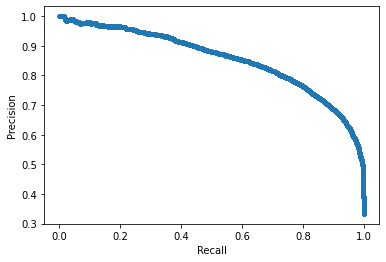

In [0]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train,train_prediction_probab)
plt.plot(recall,precision,marker='.')
plt.ylabel("Precision")
plt.xlabel("Recall")

In [0]:
np.where(precision<0.90)
# threshold[16854]

(array([    0,     1,     2, ..., 20220, 20222, 20223]),)

In [0]:
train_pred=[1 if i>=0.90 else 0 for i in train_prediction_probab]
from sklearn.metrics import precision_score,accuracy_score,classification_report
pd.crosstab(y_train, np.array(train_pred), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0.0,37952,1633,39585
1.0,1954,6095,8049
All,39906,7728,47634


In [0]:
print(classification_report(y_train,np.array(train_pred)))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     39585
         1.0       0.79      0.76      0.77      8049

    accuracy                           0.92     47634
   macro avg       0.87      0.86      0.86     47634
weighted avg       0.92      0.92      0.92     47634



In [0]:
test_prediction_probab=model.predict_proba(X_test).reshape(1,-1)[0]
test_pred=[1 if i>=0.90 else 0 for i in test_prediction_probab]
pd.crosstab(y_test, np.array(test_pred), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0.0,1054,153,1207
1.0,253,47,300
All,1307,200,1507


In [0]:
print(classification_report(y_test,np.array(test_pred)))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1207
         1.0       0.23      0.16      0.19       300

    accuracy                           0.73      1507
   macro avg       0.52      0.51      0.51      1507
weighted avg       0.69      0.73      0.71      1507



In [0]:
from sklearn.metrics import precision_score,accuracy_score
y_predicted=model.predict_classes(X_train)
y_predicted=y_predicted.reshape(1,-1)[0]
precision = precision_score(y_train, y_predicted)
accuracy=accuracy_score(y_train,y_predicted)
print("Train Precision is ",precision)
print("Train Accuracy is ",accuracy)

print(y_train.shape,y_predicted.shape)
pd.crosstab(y_train, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Train Precision is  0.4794651384909265
Train Accuracy is  0.8165805936935803
(47634,) (47634,)


Predicted,0,1,All
True,,,
0.0,30865,8720,39585
1.0,17,8032,8049
All,30882,16752,47634


In [0]:
y_predicted=model.predict_classes(X_test)
y_predicted=y_predicted.reshape(1,-1)[0]
precision = precision_score(y_test, y_predicted)
accuracy=accuracy_score(y_test,y_predicted)
print("Test Precision is ",precision)
print("Test Accuracy is ",accuracy)

pd.crosstab(y_test, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Test Precision is  0.23299319727891157
Test Accuracy is  0.5925680159256802


Predicted,0,1,All
True,,,
0.0,756,451,1207
1.0,163,137,300
All,919,588,1507
